In [25]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Question 1

L'algorithme de Stochastic Gradient Descent (SGD) prend en entrée un set de données $(x_i, y_i)_{i\in \N}$ et retourne une valeur $w_{estimated}$ estimée de $w$, de sorte à minimiser le risque empirique.

On initialise la valeur de $w$ aléatoirement dans l'algorithme. Puis, on itère un "grand" nombre de fois la méthode suivante : on calcule le gradient du risque empirique et on actualise la valeur de $w$ en retirant le gradient (pondéré par un paramètre eta, ici fixé), puis en renormalisant $w$.

On utilise le risque empirique car le risque ne peut être calculé pour tous les points : on se limite à un ensemble fini de samples. Le gradient du risque empirique se calcule en dérivant chacune des composantes de l'ensemble de données. Cette étape est très coûteuse, de complexité $n$ le nombre de samples. C'est pourquoi on effectue le calcul du gradient du risque empirique à partir de $m$ samples tirés aléatoirement parmi les $n$ à disposition. Le choix de ces $m$ données est tirés aléatoirement à chaque étape.

L'algorithme SGD converge vers la valeur optimale de $w$ : j'effectue 100000 étapes de sorte à tendre vers cette valeur optimale.

In [26]:
def empirical_risk(x, y, w):
    return np.mean((y - w.T@x)**2)

def grad_empirical_risk(x, y, w):
    return np.mean(-2*x*(y-w.T@x), axis=1)


In [98]:
def SGD(x, y, eta, sample_factor):
    dim, n_sample = np.shape(x)
    w = np.random.uniform(-1, 1, size = x.shape[0]) # Initialisation de w

    for k in range(100000):
        m = np.random.choice(np.arange(n_sample),size=(n_sample//sample_factor)) # On choisit m samples aléatoirement pour calculer le gradient
        w = w - eta * grad_empirical_risk(x[:,m],y[m],w)
        w = w / np.linalg.norm(w) # Renormalisation de w
    
    print("Dimension :", dim)
    print("Nombre samples :", n_sample)
    print("Risque final :", empirical_risk(x,y,w))
    return w

### Question 2

La méthode ci-dessous permet de générer n samples : les points x sont uniformément tirés dans le carré $[-1;1]^2$ et sont labellisés par $y$ qui détermine la position des points x par rapport à la droite définie par $w$.

In [99]:
def samples_generation(n):
    x = np.random.uniform(-1, 1, size = (2,n))
    w = np.random.uniform(-1, 1, size = 2)
    y = np.sign(w@x)
    return(x, y, w)


Par exemple, avec $n=200$ points, on obtient la figure ci-dessous.

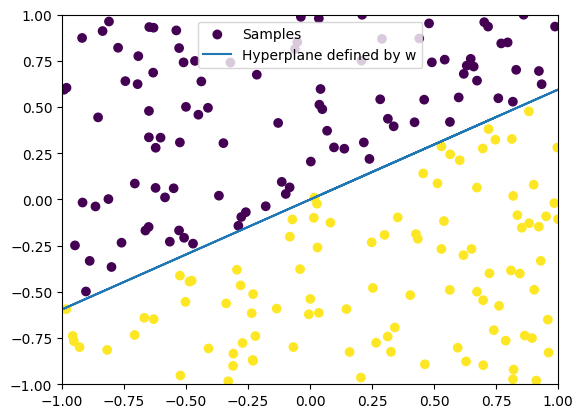

In [106]:
n = 200
x, y, w = samples_generation(n)

plt.figure()
plt.scatter(x[0,:],x[1,:],label ="Samples", c = y)
plt.plot(x[0,:],-w[0]*x[0,:]/w[1],label = "Hyperplane defined by w")
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.legend()
plt.show()

### Question 3

Je lance l'algorithme SGD sur un dataset généré par la méthode ci-dessus avec $n=1000$ points. Sur le graphe ci-dessous, on observe en bleu la droite issue de $w_{optimal}$ et en orange celle issue de $w_{estimated}$. La droite orange est très proche de la bleue de référence.

J'affiche également les valeurs de $w_{optimal}$ et $w_{estimated}$, qui sont assez proches (voir la distance relative, définie comme la norme de $w_{optimal} - w_{estimated}$)

Dimension : 2
Nombre samples : 1000
Risque final : 0.3274703058037692


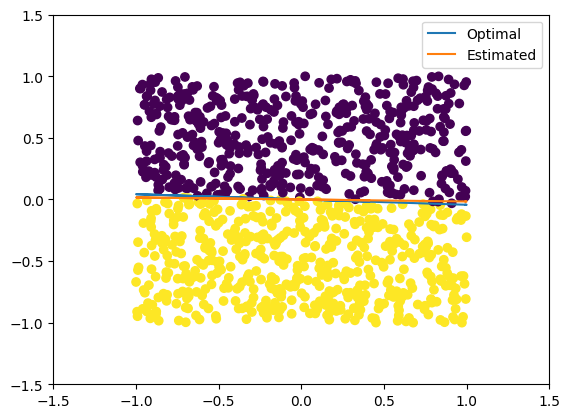

w_optimal =  [-0.01178828 -0.27428224]
w_estimated =  [-0.01623149 -0.99986826]
Distance relative :  0.7255996270490861


In [112]:
n = 1000
x, y, w = samples_generation(n)

w_estimated = SGD(x, y, eta=0.01, sample_factor=10)

plt.figure()
plt.scatter(x[0,:],x[1,:], c = y)
plt.plot(x[0,:],-w[0]*x[0,:]/w[1],label = "Optimal")
plt.plot(x[0,:],-w_estimated[0]*x[0,:]/w_estimated[1],label = "Estimated")
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.legend()
plt.show()

print('w_optimal = ', w)
print('w_estimated = ', w_estimated)
print("Distance relative : ",np.sqrt((w_estimated-w)@(w_estimated-w)))


### Question 4

En bruitant les données au taux $0.1$, on ne voit pas vraiment de différence dans la valeur de $w_{estimated}$ par rapport à $w_{optimal}$. En revanche, le graphique est plus parlant : en effet, les droites ne se confondent pas, et sont plus éloignées l'une de l'autre que dans le cas sans bruit.

In [128]:
n = 1000
noise_rate = 0.1
x, y, w = samples_generation(n)

x_noisy = x + np.random.randn(2,n)*noise_rate
w_estimated = SGD(x, y, eta=0.01, sample_factor=10)
print("w_optimal ",w)
print("w_estimated",w_estimated)
print("Distance relative : ",np.sqrt((w-w_estimated)@(w-w_estimated)))

Dimension : 2
Nombre samples : 1000
Risque final : 0.3529166766900646
w_optimal  [-0.79042986  0.28486378]
w_estimated [-0.97040196  0.24149541]
Distance relative :  0.18512366696413765


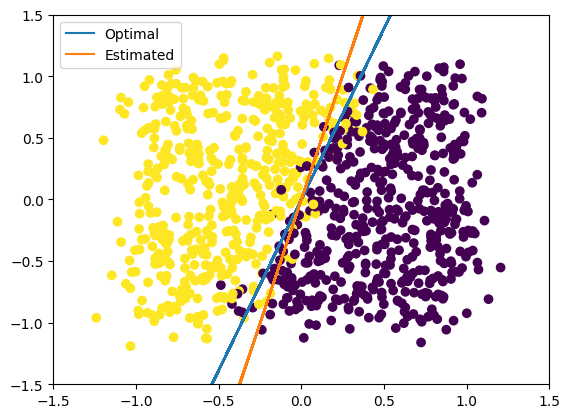

In [129]:
plt.figure()
plt.scatter(x_noisy[0,:],x_noisy[1,:], c = y)
plt.plot(x_noisy[0,:],-w[0]*x_noisy[0,:]/w[1],label = "Optimal")
plt.plot(x_noisy[0,:],-w_estimated[0]*x_noisy[0,:]/w_estimated[1],label = "Estimated")
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.legend()
plt.show()

### Question 5

Ci-dessous, je teste l'algorithme SGD sur les données issues du fichier wdbc.data (wisconsin-breast-cancer). Le risque final est assez bas, mais je n'ai pas de $w$ optimal de référence pour comparer le résultat obtenu.

Je représente les résultats sur un graphe, comme précédemment. Etant donné que les samples x sont de dimension 8, j'effectue un PCA pour garder les deux dimensions dominantes, redimmensionnées sur un carré $[-1;1]^2$, pour obtenir le graphe ci-dessous. L'hyperplan obtenu sépare plutôt correctement les données labellisées ici par les deux couleurs jaune et violet.

In [131]:
import pandas as pd

data =  pd.read_csv("wdbc.data", sep=",", header = None)
data = data.drop(labels = data[data[6]=='?'].index  ,axis=0).to_numpy()

x = data[:,2:10].astype(float)
x = (x-np.mean(x, axis=0))/np.std(x, axis=0)

y_data = (data[:,1]) # Les données y sont données sous forme 'M' ou 'B', que je traduis en +/- 1
y = np.zeros(len(x))
for i in range (len(x)):
    if y_data[i] == 'M':
        y[i] = 1
    else:
        y[i] = -1

w_estimated = SGD(np.transpose(x), y, 0.1, 10)
print("w_estimated",w_estimated)
print()

Dimension : 8
Nombre samples : 569
Risque final : 0.37106599943092144
w_estimated [ 0.61389993  0.2225356   0.17472743 -0.53325416  0.10042373 -0.15558593
  0.10469002  0.46202078]



In [118]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

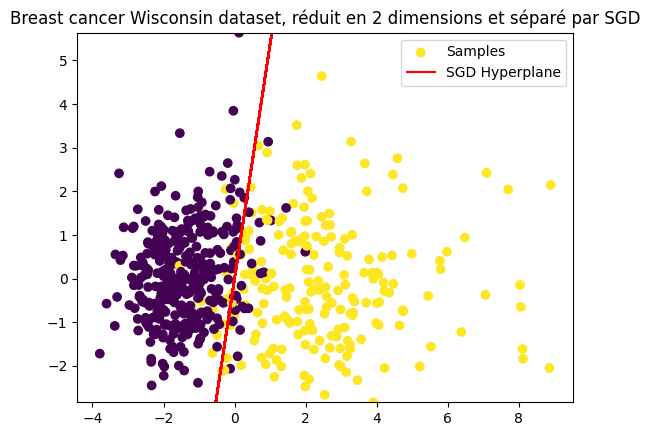

In [133]:
w_pca = pca.transform(w_estimated.reshape(1, -1))[0]

plt.figure()
plt.scatter(x_pca[:,0],x_pca[:,1],label ="Samples", c = y)
plt.plot(x_pca[:,0],-w_pca[0]*x_pca[:,0]/w_pca[1], color='r', label='SGD Hyperplane')
plt.ylim(np.min(x_pca[:,1]),np.max(x_pca[:,1]))
plt.title("Breast cancer Wisconsin dataset, réduit en 2 dimensions et séparé par SGD")
plt.legend()
plt.show()